## Selecting number of clusters 

In [1]:
#import sys
#!{sys.executable} -m pip install kneed

In [3]:
!pip install --upgrade kneed

In [2]:
# sklearn imports

    
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# pandas and numpy imports
import pandas as pd
import numpy as np

# plotting imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# import knee detection algorithm
from kneed import KneeLocator


# set sns theme and set pandas to display all rows and columns
sns.set_theme()

In [91]:
# start the assignment 3

In [3]:
df = pd.read_csv("apple_quality.csv")

In [4]:
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [5]:
df_1 = df.drop(columns=["Quality"])

In [6]:
df_1

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036
...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456


In [7]:
df_2 = df_1.drop([4000])

In [8]:
df_2

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036
...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806


In [9]:
df_final = df_2.drop(columns=["A_id"])

In [10]:
df_final

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036
...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806


In [26]:
# Different numbers of k to try out
num_clusters = [1,2,3,4,5,6,7,8,9]
# Storage for inertia value
inertia_list = []
# Storage for silhouette scores
silhouette_score_list = []
# List used to store clustering results
clustering_result_list = []

# Use StandardScaler to standardize data
standard_scaler = StandardScaler()
df_scaler = standard_scaler.fit_transform(df_final)
df_scaler = pd.DataFrame(
    data=df_scaler, 
    columns=['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']
)



In [27]:
df_scaler

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-1.798424,-0.950373,2.993421,-1.424150,0.690545,-0.089872,-0.269415
1,-0.359060,-1.154404,2.127698,0.429746,0.176767,0.197020,-0.378997
2,0.109445,-0.225759,-0.652507,-0.946892,1.205422,-0.286156,1.206044
3,-0.079977,-0.800146,0.923916,-0.772399,1.619575,-2.087320,0.338315
4,0.968573,-0.191640,0.044164,-1.096894,1.305025,-0.961548,0.201472
...,...,...,...,...,...,...,...
3995,0.291729,-0.048594,-1.669449,-0.365345,0.614425,0.931482,0.028866
3996,0.108878,1.834105,0.137124,-1.159058,-0.252634,-0.846326,0.842347
3997,-1.105655,-0.716904,-1.013784,-0.234036,0.874379,2.275957,-0.668950
3998,-1.818112,-0.492908,1.459901,-0.845446,0.854549,-0.151419,-1.093171


In [28]:
# Perform clustering for different number of clusters
inertia_list = []
# Storage for silhouette scores
silhouette_score_list = []

for k in num_clusters:
    
    # Perform k means clustering
    kmeans = KMeans(n_clusters=k,random_state=0, n_init='auto')
    kmeans.fit(df_scaler)
    y_kmean = kmeans.predict(df_scaler)

    insertia_list = kmeans.inertia_
  #  silhouette_scr = silhouette_score(df_scaler,y_kmean) 
    
    # Calculate and store inertia & silhouette score
    inertia_list.append(kmeans.inertia_)
  #  silhouette_scr = silhouette_score(artificial_df, kmeans.labels_)
#    silhouette_score_list.append(silhouette_scr)




In [29]:
inertia_list

[28000.00000000001,
 24181.79299920546,
 21459.165365557234,
 19253.669439824604,
 17740.95044134725,
 16698.62967560885,
 15949.759956930726,
 15247.894718207757,
 14624.788886787934]

In [15]:
silhouette_score_list

[0.1319472493488629,
 0.12795701216940572,
 0.1434466656310296,
 0.14461445017724192,
 0.14207094068634404,
 0.13702629711766462,
 0.13596615684007543,
 0.13448350348387453]

Text(0, 0.5, 'Distortion')

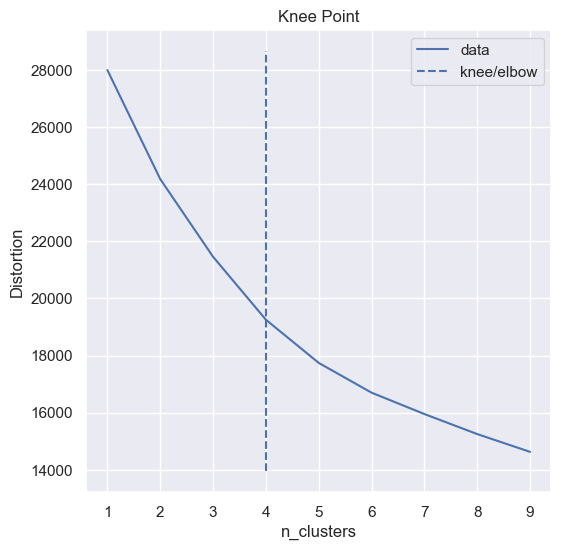

In [30]:
# Plot inertia plot and curve
kneedle = KneeLocator(
    num_clusters, 
    inertia_list, 
    S=2, 
    curve="convex", 
    direction="decreasing"
)
kneedle.plot_knee()
plt.xlabel('n_clusters')
plt.ylabel('Distortion')

Text(0, 0.5, 'silhouette score')

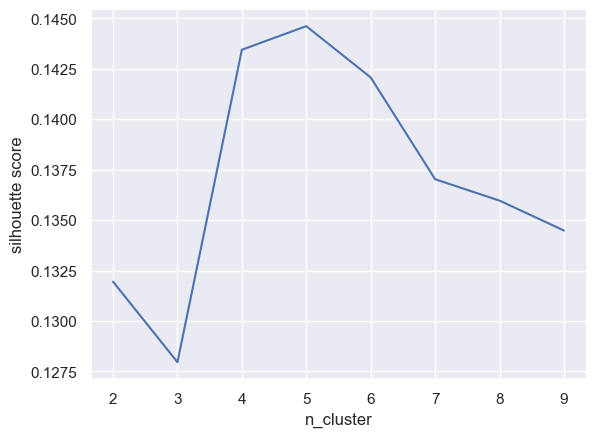

In [17]:
plt.plot(num_clusters, silhouette_score_list)
plt.xlabel('n_cluster')
plt.ylabel('silhouette score')

In [32]:
# Perform clustering for different number of clusters
#GM

from sklearn.mixture import GaussianMixture

# Storage for silhouette scores
silhouette_score_list_EM = []
EM_bic_list=[]
EM_aic_list=[]
EM_ll_list=[]


for k in num_clusters:

    gm = GaussianMixture(n_components=k, random_state=0,init_params='k-means++')
    gm.fit(df_scaler)
    y_gm=gm.predict(df_scaler)

    
  #  silhouette_scr_EM = silhouette_score(df_scaler,y_gm) 
    EM_bic=gm.bic(df_scaler)
    EM_aic=gm.aic(df_scaler)
    EM_ll=gm.score(df_scaler)
    
    # Calculate and store inertia & silhouette score
    
  #  silhouette_scr = silhouette_score(artificial_df, kmeans.labels_)
  #  silhouette_score_list_EM.append(silhouette_scr_EM)
    EM_bic_list.append(EM_bic)
    EM_aic_list.append(EM_aic)
    EM_ll_list.append(EM_ll)

Text(0, 0.5, 'Average silhouette score')

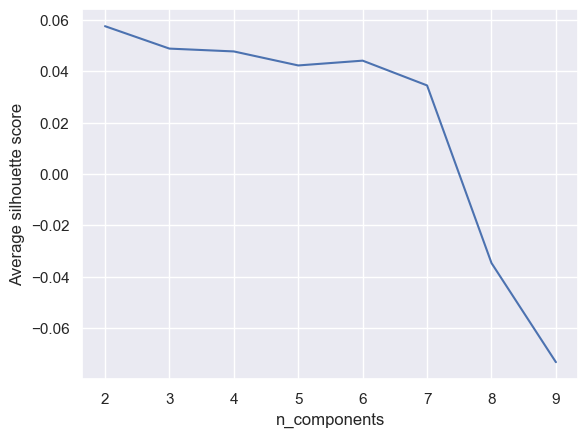

In [19]:
plt.plot(num_clusters, silhouette_score_list_EM)
plt.xlabel('n_components')
plt.ylabel('Average silhouette score')

Text(0, 0.5, 'log likeihood')

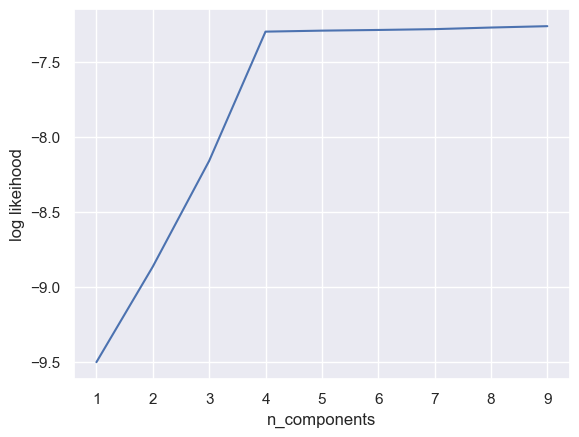

In [33]:
plt.plot(num_clusters, EM_ll_list)
plt.xlabel('n_components')
plt.ylabel('log likeihood')

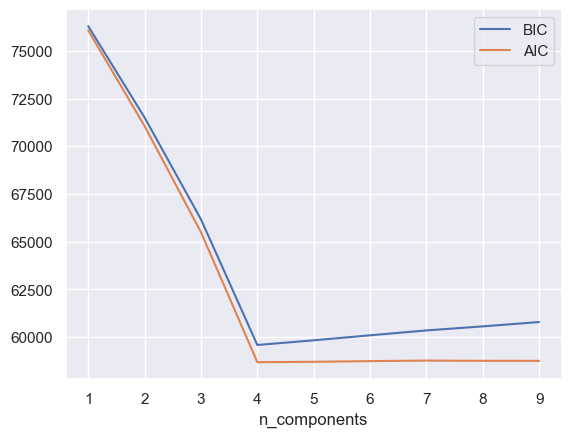

In [34]:
plt.plot(num_clusters, EM_bic_list, label='BIC')
plt.plot(num_clusters, EM_aic_list, label='AIC')
plt.xlabel('n_components')
plt.legend(loc='best')
plt.show()

In [114]:
## Dimensionality Reduction

Text(0, 0.5, 'Variance Explained')

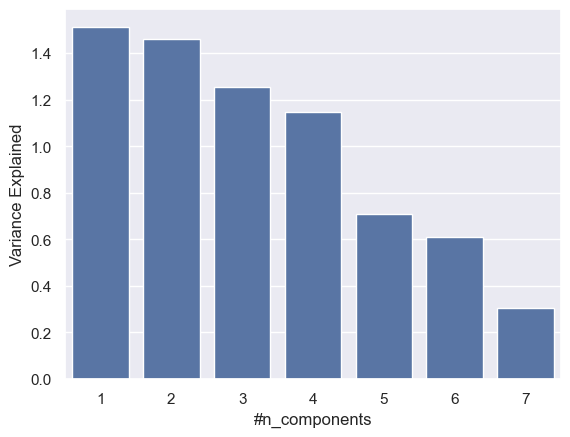

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca.fit(df_scaler)

sns.barplot(x=list(range(1,8)), y=pca.explained_variance_)
plt.xlabel('#n_components')
plt.ylabel('Variance Explained')

In [37]:
from collections import defaultdict
pca_km_res = {}
component_counts = [1,2,3,4,5,6,7]
num_clusters = [1,2,3,4,5,6,7]

for cc in component_counts:
    tmp_pca = PCA(n_components=cc, random_state=0,)
    tmp_X_tr = tmp_pca.fit_transform(df_scaler)
    tmp_res = defaultdict(dict)
    print('Doing %i components' % cc)
    tmp_res = defaultdict(dict)
    for k in num_clusters:
    
    # Perform k means clustering
        kmeans = KMeans(n_clusters=k,random_state=0, n_init='auto')
        kmeans.fit(tmp_X_tr)
        y_kmean = kmeans.predict(tmp_X_tr)

       # insertia_list = km.inertia_
   #     silhouette_scr = silhouette_score(tmp_X_tr,y_kmean) 
        tmp_res[k]['dist'] = kmeans.inertia_
        tmp_res[k]['sil']=silhouette_scr
    pca_km_res[cc]=tmp_res

Doing 1 components
Doing 2 components
Doing 3 components
Doing 4 components
Doing 5 components
Doing 6 components
Doing 7 components


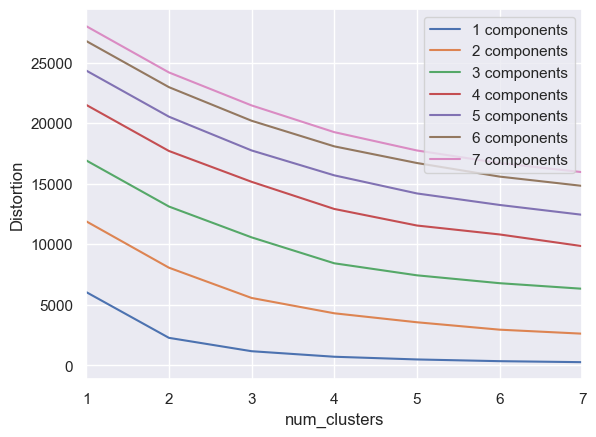

In [39]:
for cc in component_counts:
    plt.plot(num_clusters, [pca_km_res[cc][k]['dist'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('Distortion')
plt.legend(loc='best')
plt.xlim([1,7])
plt.show()

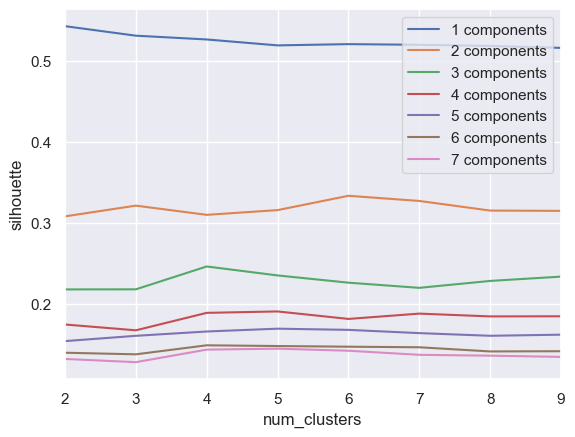

In [210]:
for cc in component_counts:
    plt.plot(num_clusters, [pca_km_res[cc][k]['sil'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('silhouette')
plt.legend(loc='best')
plt.xlim([2,9])
plt.show()


In [211]:
#PCA for EM
from collections import defaultdict
inertia_list = []
# Storage for silhouette scores
silhouette_score_list = []
component_counts = [1, 2, 3, 4,5,6,7]
pca_gm_res={}

for cc in component_counts:
    tmp_pca = PCA(n_components=cc, random_state=0)
    tmp_X_tr = tmp_pca.fit_transform(df_scaler)
    tmp_res = defaultdict(dict)
    # print('Doing %i components' % cc)
    tmp_res = defaultdict(dict)
    for k in num_clusters:
        gm = GaussianMixture(
            n_components=k,
            random_state=0,
            n_init=1,
            init_params='k-means++',
        )
        gm.fit(tmp_X_tr)
        y_gm = gm.predict(tmp_X_tr)
        tmp_res[k]['bic'] = gm.bic(tmp_X_tr)
        tmp_res[k]['aic'] = gm.aic(tmp_X_tr)
        tmp_res[k]['ll'] = gm.score(tmp_X_tr)
        tmp_res[k]['sil'] = silhouette_score(tmp_X_tr, y_gm)
        
    pca_gm_res[cc] = tmp_res

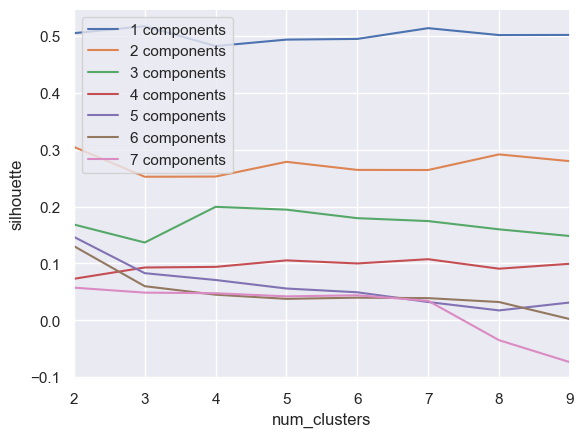

In [213]:
for cc in component_counts:
    plt.plot(num_clusters, [pca_gm_res[cc][k]['sil'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('silhouette')
plt.legend(loc='best')
plt.xlim([2,9])
plt.show()

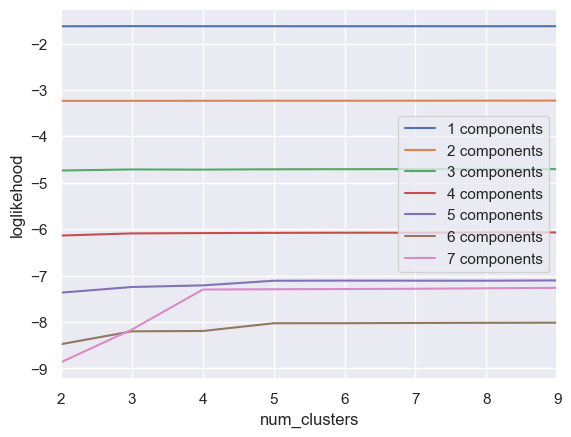

In [214]:
for cc in component_counts:
    plt.plot(num_clusters, [pca_gm_res[cc][k]['ll'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('loglikehood')
plt.legend(loc='best')
plt.xlim([2,9])
plt.show()

In [129]:
# ICA reduction

In [42]:
from sklearn.decomposition import FastICA
from scipy.stats import describe, kurtosis

ica = FastICA(
    n_components=10,
    random_state=0,
    max_iter=500,
    whiten="arbitrary-variance"
)
X_trans = ica.fit_transform(df_scaler)
kurt_df = pd.DataFrame(kurtosis(X_trans, axis=0),columns=['kurtosis'])
#kurt_df.sort_values(by='kurtosis', ascending=False)
kurt_df
#X_trans.shape


C:\Users\Student\Desktop\ML\Udemy\third_assignment\env\Lib\site-packages\sklearn\decomposition\_fastica.py:595: UserWarning: n_components is too large: it will be set to 7
  warnings.warn(


,kurtosis
0,1.415903
1,-0.969302
2,0.963500
3,-0.145184
4,0.912977
5,2.324135
6,1.050809


In [43]:
from sklearn.metrics import mean_squared_error
component_counts = [1,2,3,4,5,6,7,8,9]
total_kurtosis = {}
rmse=[]

for component_count in component_counts:
    tmp_ica = FastICA(
        random_state=0,
        n_components=component_count,
        whiten="arbitrary-variance"
    )
    tmp_X_tr = tmp_ica.fit_transform(df_scaler)
    total_kurtosis[component_count] = np.abs(kurtosis(tmp_X_tr, axis=0)).sum()
    A_=tmp_ica.mixing_
 #   rmse[component_count] = mean_squared_error(df_scaler, np.dot(tmp_X_tr, A_.T) + tmp_ica.mean_, squared=False)





C:\Users\Student\Desktop\ML\Udemy\third_assignment\env\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\Student\Desktop\ML\Udemy\third_assignment\env\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\Student\Desktop\ML\Udemy\third_assignment\env\Lib\site-packages\sklearn\decomposition\_fastica.py:595: UserWarning: n_components is too large: it will be set to 7
  warnings.warn(
C:\Users\Student\Desktop\ML\Udemy\third_assignment\env\Lib\site-packages\sklearn\decomposition\_fastica.py:595: UserWarning: n_components is too large: it will be set to 7
  warnings.warn(


(1.0, 9.0)

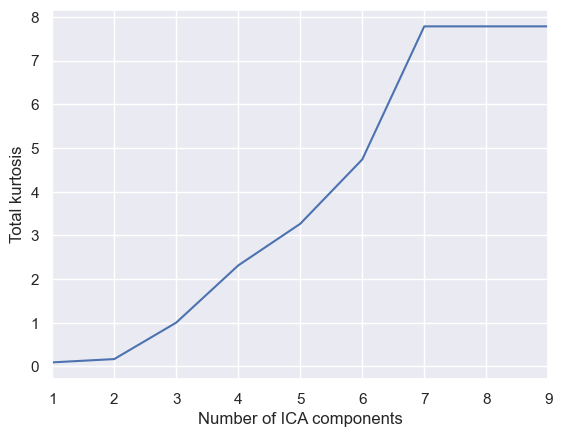

In [44]:
pd.Series(total_kurtosis).plot()
plt.ylabel('Total kurtosis')
plt.xlabel('Number of ICA components')
plt.xlim([1,9])

In [45]:
ica7 = FastICA(
    random_state=0,
    n_components=7,
)
X_tr7 = ica7.fit_transform(df_scaler)
kurt_df7 = pd.DataFrame(kurtosis(X_tr7, axis=0), columns=['kurtosis'])
kurt_df7.sort_values(by='kurtosis', ascending=False)

,kurtosis
5,2.324135
0,1.415903
6,1.050809
2,0.963500
4,0.912977
3,-0.145184
1,-0.969302


In [47]:
normed = ica7.components_[5] / np.linalg.norm(ica7.components_[5])
np.set_printoptions(suppress=True)
# normed.astype(np.float)
s = pd.Series(normed)
df_scaler.columns[s.abs() > 0.3]


Index(['Size', 'Sweetness', 'Ripeness'], dtype='object')

In [48]:
s

0   -0.559917
1    0.260749
2   -0.530870
3   -0.099815
4    0.191733
5   -0.488774
6   -0.225955
dtype: float64

In [49]:
#ICA for kmeans
ica_km_results = {}
num_clusters = [1,2,3,4,5,6,7]

for cc in component_counts:
    tmp_dr = FastICA(n_components=cc, random_state=0,max_iter=500,whiten="arbitrary-variance")
    tmp_X_tr = tmp_dr.fit_transform(df_scaler)
    tmp_res = defaultdict(dict)
    print('Doing %i components' % cc)
    for k in num_clusters:
        km = KMeans(
            n_clusters=k,
            random_state=0,
            n_init='auto'
        )
        km.fit(tmp_X_tr)
        y_km = km.predict(tmp_X_tr)
        tmp_res[k]['dist'] = km.inertia_
    #    tmp_res[k]['sil'] = silhouette_score(tmp_X_tr, y_km)
    ica_km_results[cc] = tmp_res

Doing 1 components
Doing 2 components
Doing 3 components
Doing 4 components


C:\Users\Student\Desktop\ML\Udemy\third_assignment\env\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Doing 5 components


C:\Users\Student\Desktop\ML\Udemy\third_assignment\env\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\Student\Desktop\ML\Udemy\third_assignment\env\Lib\site-packages\sklearn\decomposition\_fastica.py:595: UserWarning: n_components is too large: it will be set to 7
  warnings.warn(


Doing 6 components
Doing 7 components
Doing 8 components
Doing 9 components


C:\Users\Student\Desktop\ML\Udemy\third_assignment\env\Lib\site-packages\sklearn\decomposition\_fastica.py:595: UserWarning: n_components is too large: it will be set to 7
  warnings.warn(


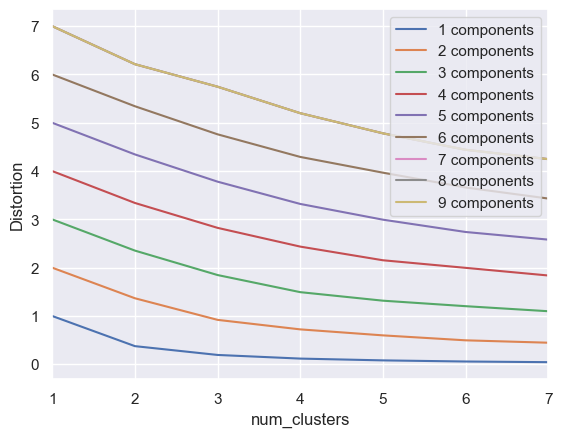

In [51]:
for cc in component_counts:
    plt.plot(num_clusters, [ica_km_results[cc][k]['dist'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('Distortion')
plt.legend(loc='best')
plt.xlim([1,7])
plt.show()

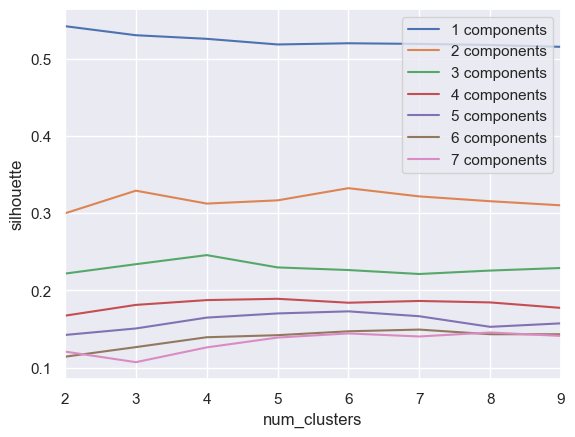

In [220]:
for cc in component_counts:
    plt.plot(num_clusters, [ica_km_results[cc][k]['sil'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('silhouette')
plt.legend(loc='best')
plt.xlim([2,9])
plt.show()

In [52]:
#ICA for EM
ica_em_res = {}
num_clusters = [1,2,3,4,5,6,7]

for cc in component_counts:
    tmp_dr = FastICA(n_components=cc, random_state=0,max_iter=500,whiten="arbitrary-variance")
    tmp_X_tr = tmp_dr.fit_transform(df_scaler)
    tmp_res = defaultdict(dict)
    print('Doing %i components' % cc)
    for k in num_clusters:
        gm = GaussianMixture(
            n_components=k,
            random_state=0,
            n_init=1,
            init_params='k-means++',
        )
        gm.fit(tmp_X_tr)
        y_gm = gm.predict(tmp_X_tr)
        tmp_res[k]['bic'] = gm.bic(tmp_X_tr)
        tmp_res[k]['aic'] = gm.aic(tmp_X_tr)
        tmp_res[k]['ll'] = gm.score(tmp_X_tr)
    #    tmp_res[k]['sil'] = silhouette_score(tmp_X_tr, y_gm)
        
    ica_em_res[cc] = tmp_res

Doing 1 components
Doing 2 components
Doing 3 components
Doing 4 components


C:\Users\Student\Desktop\ML\Udemy\third_assignment\env\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Doing 5 components


C:\Users\Student\Desktop\ML\Udemy\third_assignment\env\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Doing 6 components
Doing 7 components


C:\Users\Student\Desktop\ML\Udemy\third_assignment\env\Lib\site-packages\sklearn\decomposition\_fastica.py:595: UserWarning: n_components is too large: it will be set to 7
  warnings.warn(


Doing 8 components


C:\Users\Student\Desktop\ML\Udemy\third_assignment\env\Lib\site-packages\sklearn\decomposition\_fastica.py:595: UserWarning: n_components is too large: it will be set to 7
  warnings.warn(


Doing 9 components


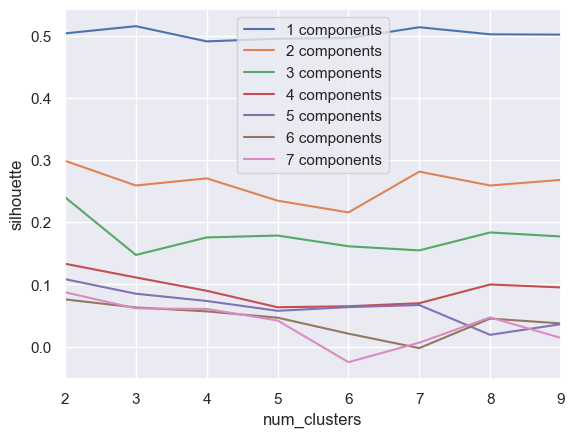

In [238]:
for cc in component_counts:
    plt.plot(num_clusters, [ica_em_res[cc][k]['sil'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('silhouette')
plt.legend(loc='best')
plt.xlim([2,9])
plt.show()

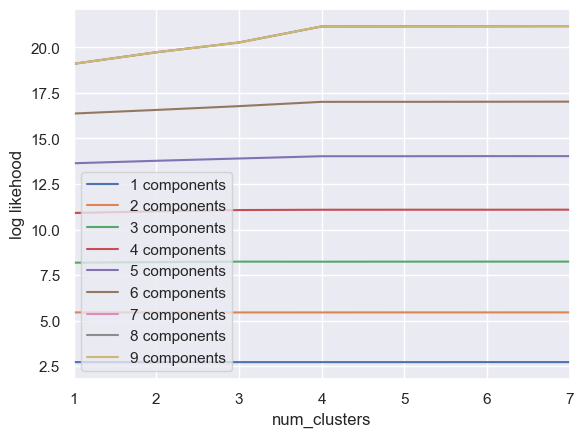

In [53]:
for cc in component_counts:
    plt.plot(num_clusters, [ica_em_res[cc][k]['ll'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('log likehood')
plt.legend(loc='best')
plt.xlim([1,7])
plt.show()

In [166]:
# Randomized Projections

In [57]:
import numpy as np
from sklearn import random_projection
from sklearn.random_projection import SparseRandomProjection

rp = SparseRandomProjection(
        random_state=0,
        n_components=2
    )
rp.fit(df_scaler)
rp_components = rp.components_
rp_components.shape


(2, 7)

In [58]:
df_scaler.shape

(4000, 7)

C:\Users\Student\Desktop\ML\Udemy\third_assignment\env\Lib\site-packages\sklearn\random_projection.py:408: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (7 < 8).The dimensionality of the problem will not be reduced.
  warnings.warn(


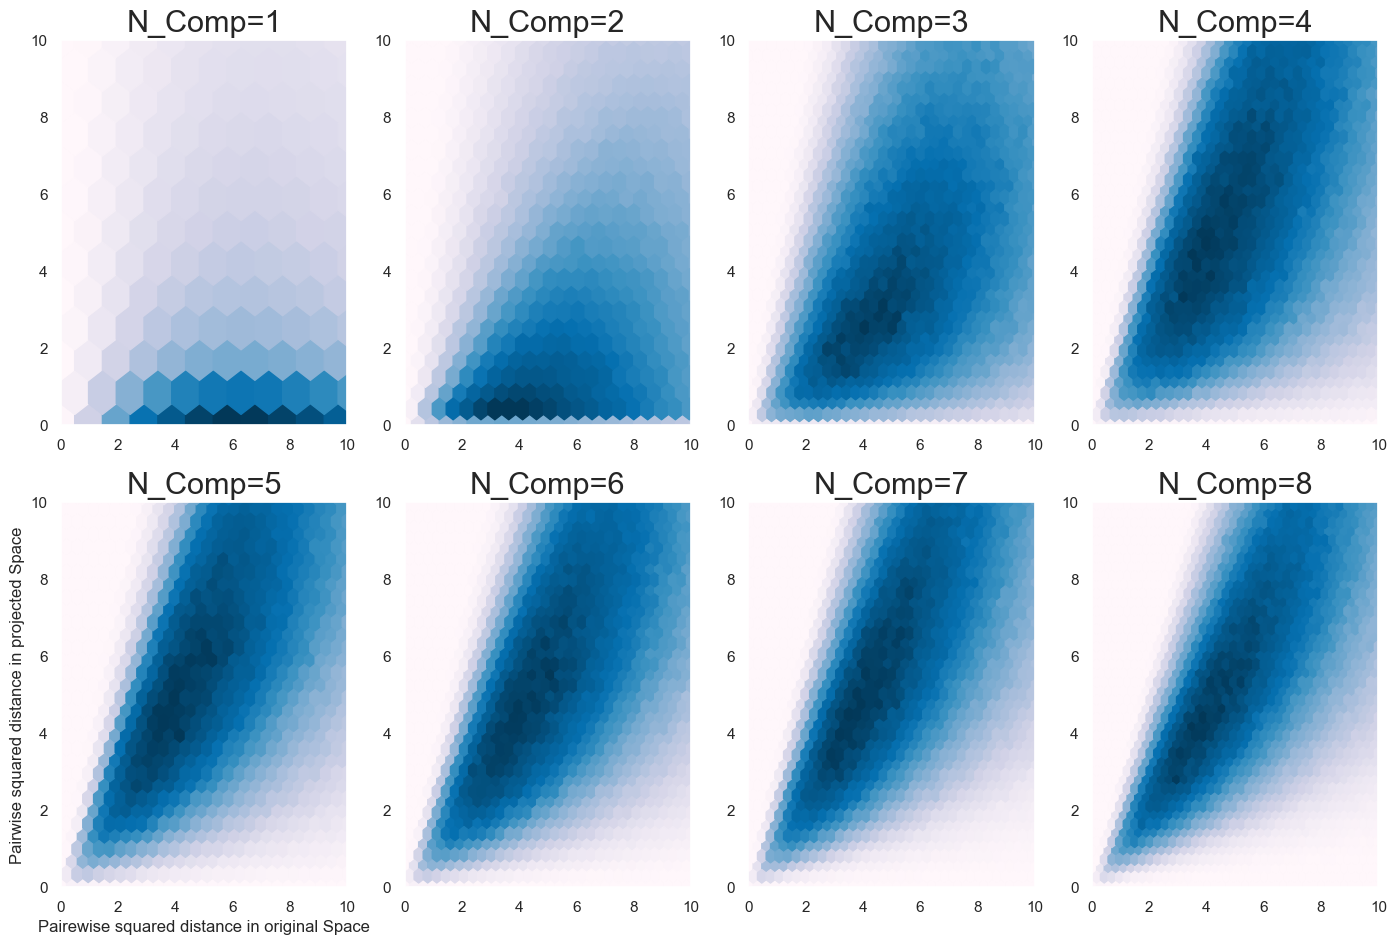

In [59]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import random_projection

f, ax = plt.subplots(2,4, figsize=(17, 11))
for i in range(1,9):
    n_comp = i
    transformer = random_projection.GaussianRandomProjection(n_components=n_comp, random_state=0)
    projected_data = transformer.fit_transform(df_scaler)

    dists = euclidean_distances(df_scaler, squared=True).ravel()
    nonzero = dists != 0
    dists = dists[nonzero]

    projected_dists = euclidean_distances(
        projected_data, squared=True).ravel()[nonzero]
    i -= 1
    min_dist = min(projected_dists.min(), dists.min())
    max_dist = max(projected_dists.max(), dists.max())
    ax[i//4][i%4].hexbin(dists, projected_dists, gridsize=1000, cmap=plt.cm.PuBu,
               extent=[min_dist, max_dist, min_dist, max_dist])
    ax[i//4][i%4].set_title("N_Comp=%d" % n_comp, fontsize=22)
    ax[1][0].set_xlabel("Pairewise squared distance in original Space", fontsize=12)
    ax[1][0].set_ylabel("Pairwise squared distance in projected Space", fontsize=12)
    ax[i//4][i%4].set_xlim(0, 10)
    ax[i//4][i%4].set_ylim(0, 10)

In [60]:
# PR for kmean
component_counts = [1, 2, 3,4,5,6,7]
rp_km_results = {}
num_clusters=[1,2,3,4,5,6,7]

for cc in component_counts:
    tmp_dr = SparseRandomProjection(n_components=cc, random_state=0)
    tmp_X_tr = tmp_dr.fit_transform(df_scaler)
    tmp_res = defaultdict(dict)
    # print('Doing %i components' % cc)
    for k in num_clusters:
        km = KMeans(
            n_clusters=k,
            random_state=0,
            n_init='auto'
        )
        km.fit(tmp_X_tr)
        y_km = km.predict(tmp_X_tr)
        tmp_res[k]['dist'] = km.inertia_
        
#         tmp_res[k]['sil'] = silhouette_score(tmp_X_tr, y_km, random_state=0)
        
 #       print('done k=%i in %.3f sec' % (k, t))
        tmp_res[k]['dist'] = km.inertia_
#        tmp_res[k]['sil'] = silhouette_score(tmp_X_tr, y_km)
    
    rp_km_results[cc] = tmp_res

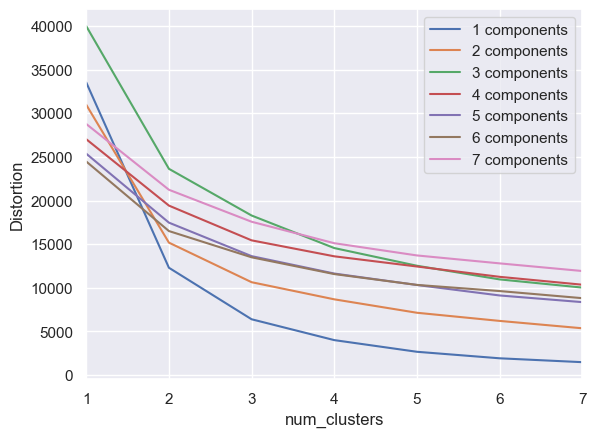

In [64]:
for cc in component_counts:
    plt.plot(num_clusters, [rp_km_results[cc][k]['dist'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('Distortion')
plt.legend(loc='best')
plt.xlim([1,7])
plt.show()

In [63]:
for cc in component_counts:
    plt.plot(num_clusters, [rp_km_results[cc][k]['sil'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
#plt.ylabel('silhouette')
plt.legend(loc='best')
plt.xlim([1,7])
plt.show()

KeyError: 'sil'

In [229]:
# RP for EM

In [66]:
from collections import defaultdict
inertia_list = []
# Storage for silhouette scores
silhouette_score_list = []
component_counts = [1, 2, 3, 4,5,6,7]
RP_gm_res={}

for cc in component_counts:
    tmp_dr = SparseRandomProjection(n_components=cc, random_state=0)
    tmp_X_tr = tmp_dr.fit_transform(df_scaler)
    tmp_res = defaultdict(dict)
    # print('Doing %i components' % cc)
    tmp_res = defaultdict(dict)
    for k in num_clusters:
        gm = GaussianMixture(
            n_components=k,
            random_state=0,
            n_init=1,
            init_params='k-means++',
        )
        gm.fit(tmp_X_tr)
        y_gm = gm.predict(tmp_X_tr)
        tmp_res[k]['bic'] = gm.bic(tmp_X_tr)
        tmp_res[k]['aic'] = gm.aic(tmp_X_tr)
        tmp_res[k]['ll'] = gm.score(tmp_X_tr)
   #     tmp_res[k]['sil'] = silhouette_score(tmp_X_tr, y_gm)
        
    RP_gm_res[cc] = tmp_res

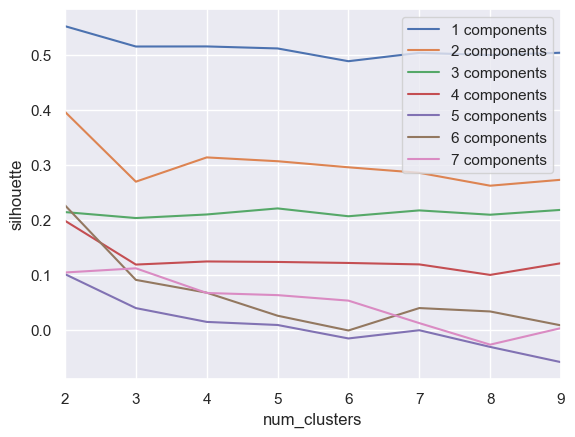

In [234]:
for cc in component_counts:
    plt.plot(num_clusters, [RP_gm_res[cc][k]['sil'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('silhouette')
plt.legend(loc='best')
plt.xlim([2,9])
plt.show()

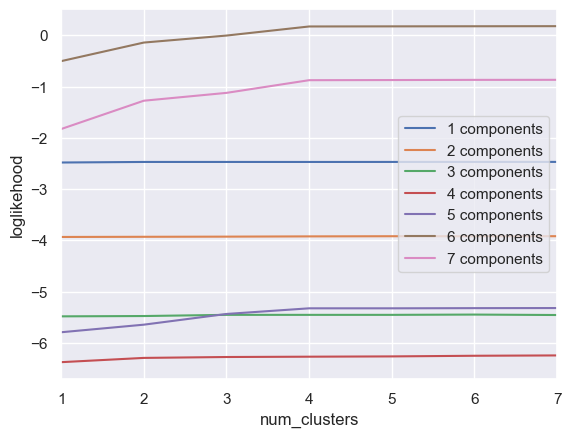

In [67]:
for cc in component_counts:
    plt.plot(num_clusters, [RP_gm_res[cc][k]['ll'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('loglikehood')
plt.legend(loc='best')
plt.xlim([1,7])
plt.show()

In [179]:
# non-linearL maniforld learning
# isomap

In [69]:
from sklearn.manifold import Isomap
df_scaler.shape



(4000, 7)

In [70]:
embedding = Isomap(n_components=2)
X_transformed = embedding.fit_transform(df_scaler[:100])
X_transformed.shape

(100, 2)

In [240]:
#isomap for kmean

In [71]:
# isomap for kmean
component_counts = [1, 2, 3,4,5,6,7]
iso_km_results = {}
num_clusters = [1,2,3,4,5,6,7]

for cc in component_counts:
    tmp_dr = Isomap(n_components=cc)
    tmp_X_tr = tmp_dr.fit_transform(df_scaler)
    tmp_res = defaultdict(dict)
    # print('Doing %i components' % cc)
    for k in num_clusters:
        km = KMeans(
            n_clusters=k,
            random_state=0,
            n_init='auto'
        )
        km.fit(tmp_X_tr)
        y_km = km.predict(tmp_X_tr)
        tmp_res[k]['dist'] = km.inertia_
        
#         tmp_res[k]['sil'] = silhouette_score(tmp_X_tr, y_km, random_state=0)
        
 #       print('done k=%i in %.3f sec' % (k, t))
        tmp_res[k]['dist'] = km.inertia_
 #       tmp_res[k]['sil'] = silhouette_score(tmp_X_tr, y_km)
    
    iso_km_results[cc] = tmp_res

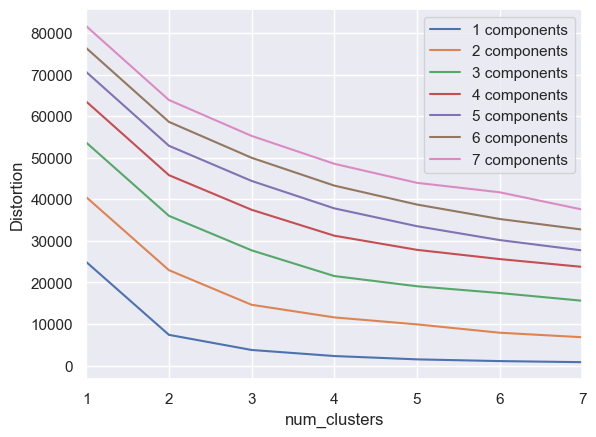

In [73]:
for cc in component_counts:
    plt.plot(num_clusters, [iso_km_results[cc][k]['dist'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('Distortion')
plt.legend(loc='best')
plt.xlim([1,7])
plt.show()

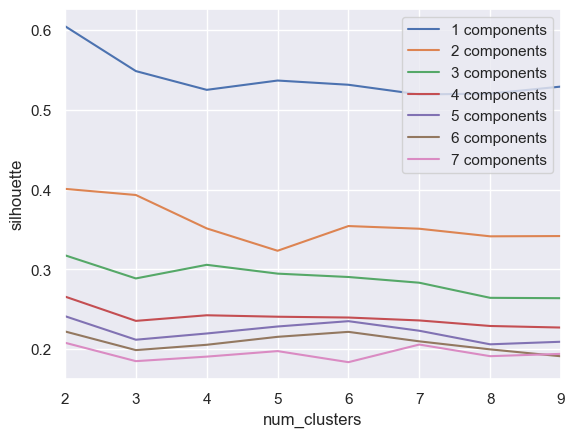

In [244]:
for cc in component_counts:
    plt.plot(num_clusters, [iso_km_results[cc][k]['sil'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('silhouette')
plt.legend(loc='best')
plt.xlim([2,9])
plt.show()

In [74]:
# isomap for EM
component_counts = [1, 2, 3,4,5,6,7]
iso_em_res = {}
num_clusters =[1,2,3,4,5,6,7]


for cc in component_counts:
    tmp_dr = Isomap(n_components=cc)
    tmp_X_tr = tmp_dr.fit_transform(df_scaler)
    tmp_res = defaultdict(dict)
    # print('Doing %i components' % cc)
    for k in num_clusters:
        gm = GaussianMixture(
            n_components=k,
            random_state=0,
            n_init=1,
            init_params='k-means++',
        )
        gm.fit(tmp_X_tr)
        y_gm = gm.predict(tmp_X_tr)
        tmp_res[k]['bic'] = gm.bic(tmp_X_tr)
        tmp_res[k]['aic'] = gm.aic(tmp_X_tr)
        tmp_res[k]['ll'] = gm.score(tmp_X_tr)
  #      tmp_res[k]['sil'] = silhouette_score(tmp_X_tr, y_gm)
        
    iso_em_res[cc] = tmp_res

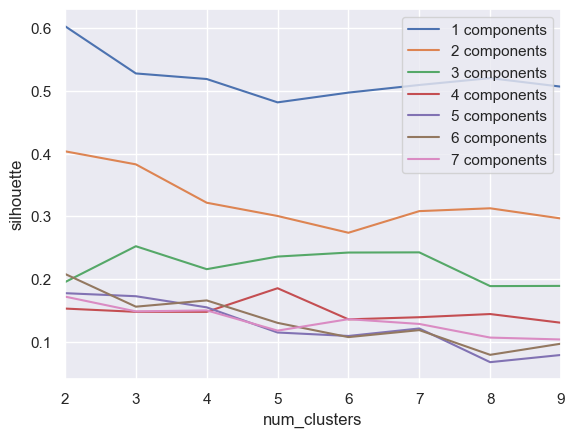

In [248]:
for cc in component_counts:
    plt.plot(num_clusters, [iso_em_res[cc][k]['sil'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('silhouette')
plt.legend(loc='best')
plt.xlim([2,9])
plt.show()

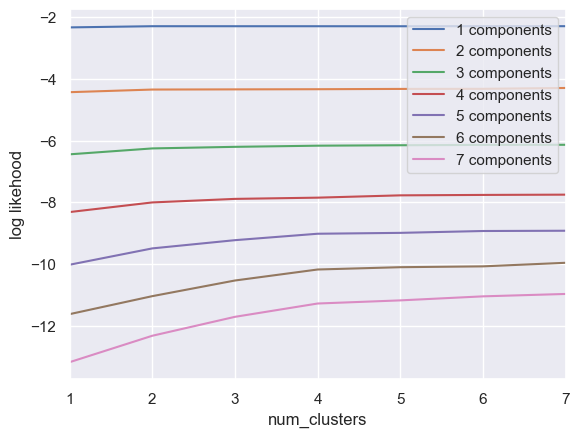

In [76]:
for cc in component_counts:
    plt.plot(num_clusters, [iso_em_res[cc][k]['ll'] for k in num_clusters], label='%i components' % cc)

plt.xlabel('num_clusters')
plt.ylabel('log likehood')
plt.legend(loc='best')
plt.xlim([1,7])
plt.show()

In [250]:
df_scaler.shape

(4000, 7)

In [251]:
tmp_X_tr.shape

(4000, 7)

In [252]:
tmp_dr = Isomap(n_components=1)
tmp_X_tr = tmp_dr.fit_transform(df_scaler)

In [253]:
tmp_X_tr.shape

(4000, 1)

In [254]:
tmp_X_tr

array([[-4.29297391],
       [-2.97862204],
       [ 1.78802616],
       ...,
       [-2.14580987],
       [-4.0571408 ],
       [ 2.97473441]])

In [255]:
tmp_dr = Isomap(n_components=2)
tmp_X_tr = tmp_dr.fit_transform(df_scaler)

In [256]:
tmp_X_tr

array([[-4.29297391,  3.23352466],
       [-2.97862204,  2.24371822],
       [ 1.78802616,  1.66802129],
       ...,
       [-2.14580987, -0.67387407],
       [-4.0571408 ,  2.40365599],
       [ 2.97473441,  1.74335968]])

In [257]:
df_1 = pd.read_csv("apple_quality.csv")

In [258]:
df_1

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [259]:
df_1= df_1.replace(to_replace="good", value = 1)

In [260]:
df_1= df_1.replace(to_replace="bad", value = 0)

C:\Users\Student\AppData\Local\Temp\ipykernel_24348\113555832.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1= df_1.replace(to_replace="bad", value = 0)


In [261]:
df_1

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1.0
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1.0
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0.0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1.0
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1.0
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1.0
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0.0
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1.0
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,1.0


In [262]:
df_1=df_1.drop(4000)

In [263]:
df_1

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1.0
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1.0
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0.0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1.0
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1.0
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,0.0
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1.0
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0.0
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1.0


In [264]:
X_1 = df_1.drop("Quality",axis=1)
y_1= df_1["Quality"]

In [265]:
y_1

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
3995    0.0
3996    1.0
3997    0.0
3998    1.0
3999    1.0
Name: Quality, Length: 4000, dtype: float64

In [266]:
X_1

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036
...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806


In [267]:
df_x = X_1.drop(columns=["A_id"])

In [268]:
df_x

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036
...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806


In [269]:


# Use StandardScaler to standardize data
standard_scaler = StandardScaler()
df_scaler = standard_scaler.fit_transform(df_x)
df_scaler = pd.DataFrame(
    data=df_scaler, 
    columns=['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']
)

In [270]:
df_scaler

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-1.798424,-0.950373,2.993421,-1.424150,0.690545,-0.089872,-0.269415
1,-0.359060,-1.154404,2.127698,0.429746,0.176767,0.197020,-0.378997
2,0.109445,-0.225759,-0.652507,-0.946892,1.205422,-0.286156,1.206044
3,-0.079977,-0.800146,0.923916,-0.772399,1.619575,-2.087320,0.338315
4,0.968573,-0.191640,0.044164,-1.096894,1.305025,-0.961548,0.201472
...,...,...,...,...,...,...,...
3995,0.291729,-0.048594,-1.669449,-0.365345,0.614425,0.931482,0.028866
3996,0.108878,1.834105,0.137124,-1.159058,-0.252634,-0.846326,0.842347
3997,-1.105655,-0.716904,-1.013784,-0.234036,0.874379,2.275957,-0.668950
3998,-1.818112,-0.492908,1.459901,-0.845446,0.854549,-0.151419,-1.093171


In [272]:
y_1.shape

(4000,)

In [273]:
#PCA reduction

In [274]:
tmp_pca = PCA(n_components=2, random_state=0)
tmp_X_tr = tmp_pca.fit_transform(df_scaler)

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier

%matplotlib inline

In [276]:
# import NN model
NN = MLPClassifier()
NN.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [277]:
# model evalutions
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score

In [278]:
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(df_scaler,y_1,test_size=0.25)

In [279]:
layer_size = range(1,100,10)
train_scores=[]
test_scores=[]
# loop through layers
for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000)
    NN.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(NN.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(NN.score(X1_test,y1_test))

Max neural network score on the test data: 94.80%


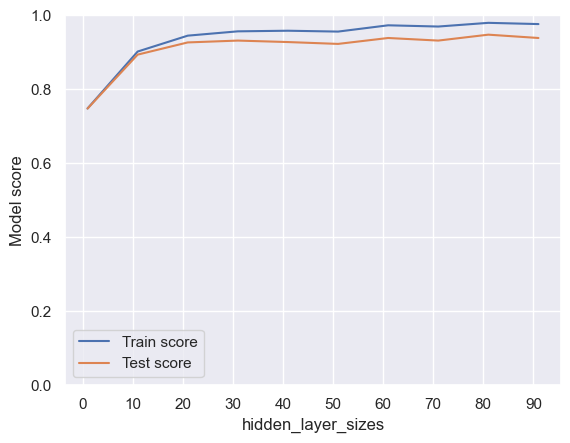

In [280]:
plt.plot(layer_size, train_scores, label="Train score")
plt.plot(layer_size, test_scores, label="Test score")
plt.ylim(0,1)
plt.xticks(np.arange(0,100,10))
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Model score")
plt.legend()

print(f"Max neural network score on the test data: {max(test_scores)*100:.2f}%")

In [281]:
f1_train_scores_logistic=[]
f1_test_scores_logistic=[]

for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000,activation='logistic')
    NN.fit(X1_train,y1_train)
    y1_train_pred = NN.predict(X1_train)
    y1_test_pred = NN.predict(X1_test)
    # update the training scores list
    f1_train_scores_logistic.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_logistic.append(f1_score(y1_test,y1_test_pred))


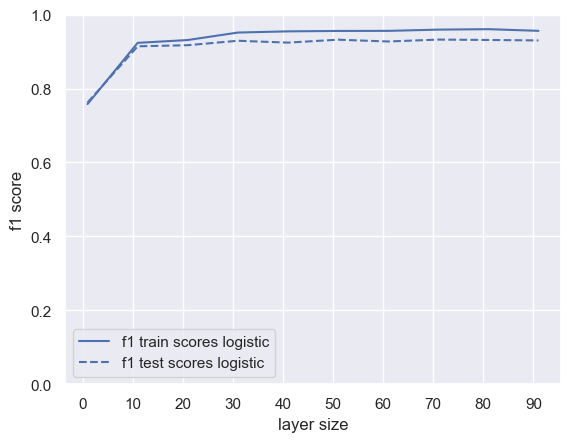

In [284]:

plt.plot(layer_size, f1_train_scores_logistic, label="f1 train scores logistic",color='C0',)
plt.plot(layer_size, f1_test_scores_logistic, label="f1 test scores logistic",color='C0', linestyle='--',)
plt.xticks(np.arange(0,100,10))
plt.ylim(0,1)
plt.xlabel("layer size")
plt.ylabel("f1 score")
plt.legend()

In [287]:
# above is for original data

In [292]:
# 2 component

In [293]:
tmp_pca = PCA(n_components=2, random_state=0)
tmp_X_tr = tmp_pca.fit_transform(df_scaler)

In [294]:
# import NN model
NN = MLPClassifier()

In [295]:
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(tmp_X_tr,y_1,test_size=0.25)

In [296]:
layer_size = range(1,100,10)
train_scores=[]
test_scores=[]
# loop through layers
for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000)
    NN.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(NN.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(NN.score(X1_test,y1_test))

Max neural network score on the test data: 67.30%


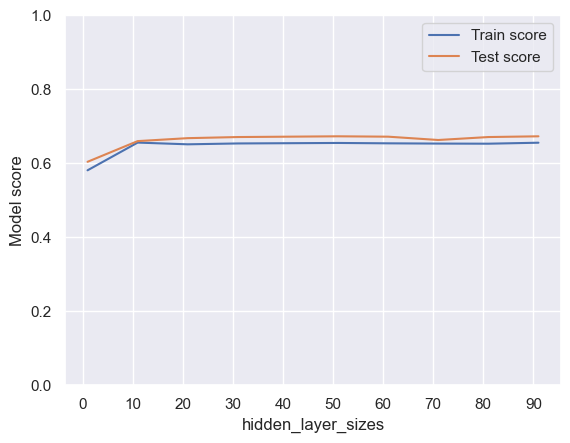

In [297]:
plt.plot(layer_size, train_scores, label="Train score")
plt.plot(layer_size, test_scores, label="Test score")
plt.ylim(0,1)
plt.xticks(np.arange(0,100,10))
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Model score")
plt.legend()

print(f"Max neural network score on the test data: {max(test_scores)*100:.2f}%")

In [298]:
f1_train_scores_logistic=[]
f1_test_scores_logistic=[]

for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000,activation='logistic')
    NN.fit(X1_train,y1_train)
    y1_train_pred = NN.predict(X1_train)
    y1_test_pred = NN.predict(X1_test)
    # update the training scores list
    f1_train_scores_logistic.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_logistic.append(f1_score(y1_test,y1_test_pred))

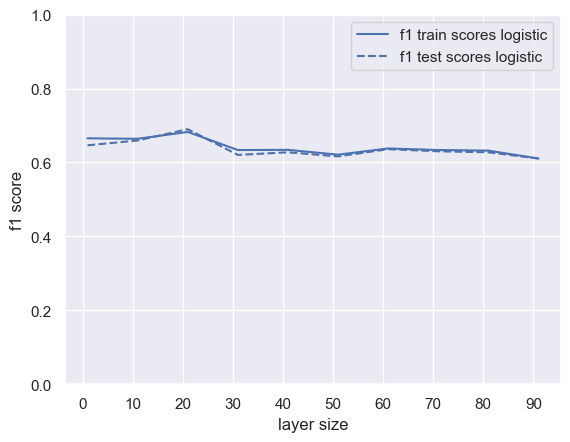

In [299]:
plt.plot(layer_size, f1_train_scores_logistic, label="f1 train scores logistic",color='C0',)
plt.plot(layer_size, f1_test_scores_logistic, label="f1 test scores logistic",color='C0', linestyle='--',)
plt.xticks(np.arange(0,100,10))
plt.ylim(0,1)
plt.xlabel("layer size")
plt.ylabel("f1 score")
plt.legend()

In [300]:
# 4 compoenet

In [301]:
tmp_pca = PCA(n_components=4, random_state=0)
tmp_X_tr = tmp_pca.fit_transform(df_scaler)

In [302]:
# import NN model
NN = MLPClassifier()

In [303]:
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(tmp_X_tr,y_1,test_size=0.25)

In [304]:
layer_size = range(1,100,10)
train_scores=[]
test_scores=[]
# loop through layers
for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000)
    NN.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(NN.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(NN.score(X1_test,y1_test))

Max neural network score on the test data: 77.40%


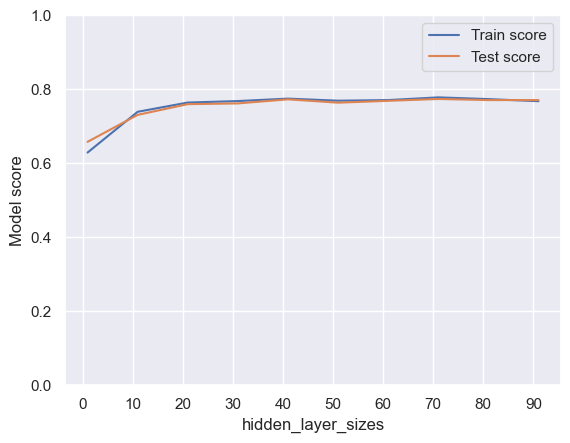

In [305]:
plt.plot(layer_size, train_scores, label="Train score")
plt.plot(layer_size, test_scores, label="Test score")
plt.ylim(0,1)
plt.xticks(np.arange(0,100,10))
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Model score")
plt.legend()

print(f"Max neural network score on the test data: {max(test_scores)*100:.2f}%")

In [306]:
f1_train_scores_logistic=[]
f1_test_scores_logistic=[]

for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000,activation='logistic')
    NN.fit(X1_train,y1_train)
    y1_train_pred = NN.predict(X1_train)
    y1_test_pred = NN.predict(X1_test)
    # update the training scores list
    f1_train_scores_logistic.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_logistic.append(f1_score(y1_test,y1_test_pred))

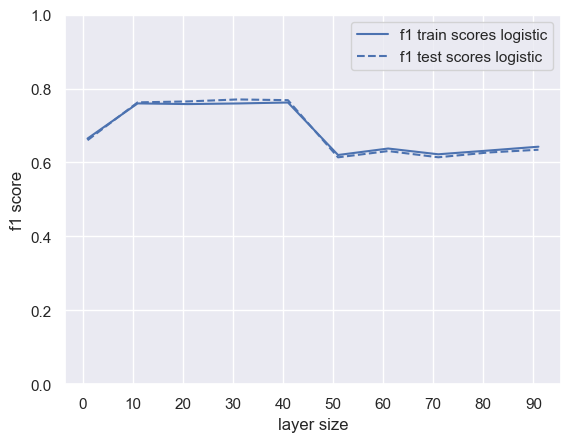

In [307]:
plt.plot(layer_size, f1_train_scores_logistic, label="f1 train scores logistic",color='C0',)
plt.plot(layer_size, f1_test_scores_logistic, label="f1 test scores logistic",color='C0', linestyle='--',)
plt.xticks(np.arange(0,100,10))
plt.ylim(0,1)
plt.xlabel("layer size")
plt.ylabel("f1 score")
plt.legend()

In [308]:
# ICA reduction 2 component

In [309]:
tmp_dr = FastICA(n_components=2, random_state=0,max_iter=500,whiten="arbitrary-variance")
tmp_X_tr = tmp_dr.fit_transform(df_scaler)

In [310]:
# import NN model
NN = MLPClassifier()
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(tmp_X_tr,y_1,test_size=0.25)

In [311]:
layer_size = range(1,100,10)
train_scores=[]
test_scores=[]
# loop through layers
for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000)
    NN.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(NN.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(NN.score(X1_test,y1_test))

Max neural network score on the test data: 64.00%


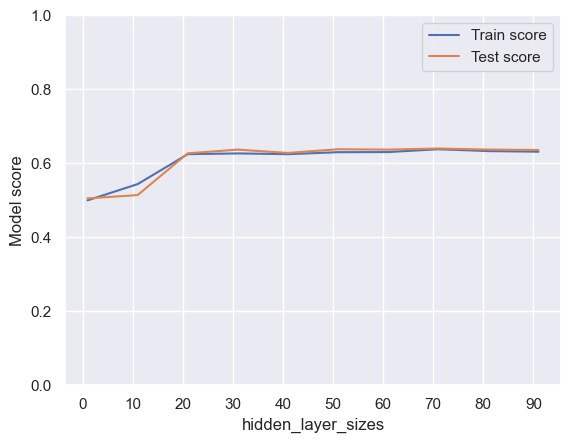

In [312]:
plt.plot(layer_size, train_scores, label="Train score")
plt.plot(layer_size, test_scores, label="Test score")
plt.ylim(0,1)
plt.xticks(np.arange(0,100,10))
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Model score")
plt.legend()

print(f"Max neural network score on the test data: {max(test_scores)*100:.2f}%")

In [313]:
f1_train_scores_logistic=[]
f1_test_scores_logistic=[]

for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000,activation='logistic')
    NN.fit(X1_train,y1_train)
    y1_train_pred = NN.predict(X1_train)
    y1_test_pred = NN.predict(X1_test)
    # update the training scores list
    f1_train_scores_logistic.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_logistic.append(f1_score(y1_test,y1_test_pred))

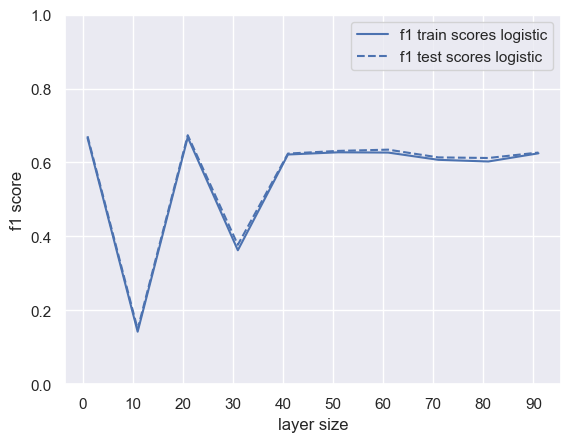

In [314]:
plt.plot(layer_size, f1_train_scores_logistic, label="f1 train scores logistic",color='C0',)
plt.plot(layer_size, f1_test_scores_logistic, label="f1 test scores logistic",color='C0', linestyle='--',)
plt.xticks(np.arange(0,100,10))
plt.ylim(0,1)
plt.xlabel("layer size")
plt.ylabel("f1 score")
plt.legend()

In [315]:
# ICA reduction 4 component

In [316]:
tmp_dr = FastICA(n_components=4, random_state=0,max_iter=500,whiten="arbitrary-variance")
tmp_X_tr = tmp_dr.fit_transform(df_scaler)

In [317]:
# import NN model
NN = MLPClassifier()
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(tmp_X_tr,y_1,test_size=0.25)

In [318]:
layer_size = range(1,100,10)
train_scores=[]
test_scores=[]
# loop through layers
for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000)
    NN.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(NN.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(NN.score(X1_test,y1_test))

Max neural network score on the test data: 74.60%


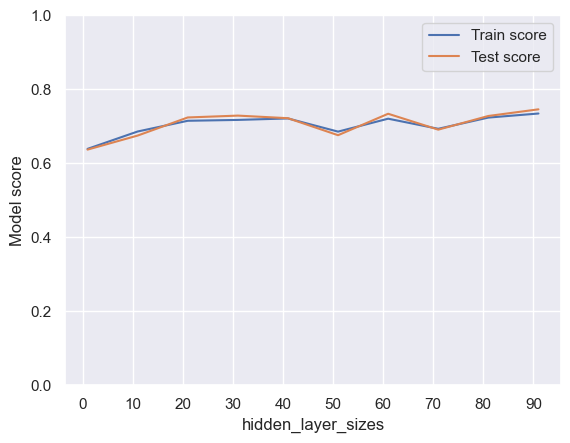

In [319]:
plt.plot(layer_size, train_scores, label="Train score")
plt.plot(layer_size, test_scores, label="Test score")
plt.ylim(0,1)
plt.xticks(np.arange(0,100,10))
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Model score")
plt.legend()

print(f"Max neural network score on the test data: {max(test_scores)*100:.2f}%")

In [320]:
f1_train_scores_logistic=[]
f1_test_scores_logistic=[]

for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000,activation='logistic')
    NN.fit(X1_train,y1_train)
    y1_train_pred = NN.predict(X1_train)
    y1_test_pred = NN.predict(X1_test)
    # update the training scores list
    f1_train_scores_logistic.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_logistic.append(f1_score(y1_test,y1_test_pred))

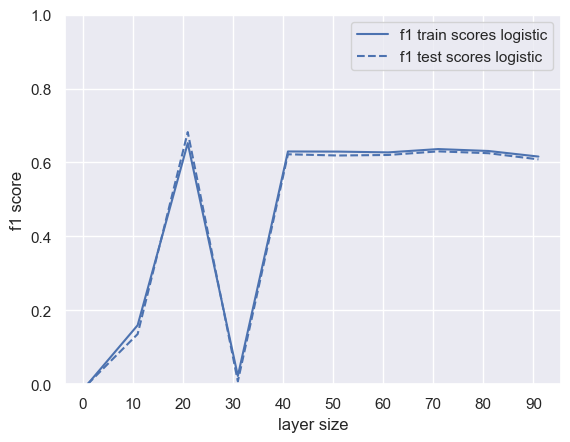

In [321]:
plt.plot(layer_size, f1_train_scores_logistic, label="f1 train scores logistic",color='C0',)
plt.plot(layer_size, f1_test_scores_logistic, label="f1 test scores logistic",color='C0', linestyle='--',)
plt.xticks(np.arange(0,100,10))
plt.ylim(0,1)
plt.xlabel("layer size")
plt.ylabel("f1 score")
plt.legend()

In [322]:
# RP reduction 2 

In [323]:
tmp_dr = SparseRandomProjection(n_components=2, random_state=0)
tmp_X_tr = tmp_dr.fit_transform(df_scaler)
tmp_res = defaultdict(dict)

In [324]:
# import NN model
NN = MLPClassifier()
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(tmp_X_tr,y_1,test_size=0.25)

In [325]:
layer_size = range(1,100,10)
train_scores=[]
test_scores=[]
# loop through layers
for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000)
    NN.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(NN.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(NN.score(X1_test,y1_test))

Max neural network score on the test data: 65.20%


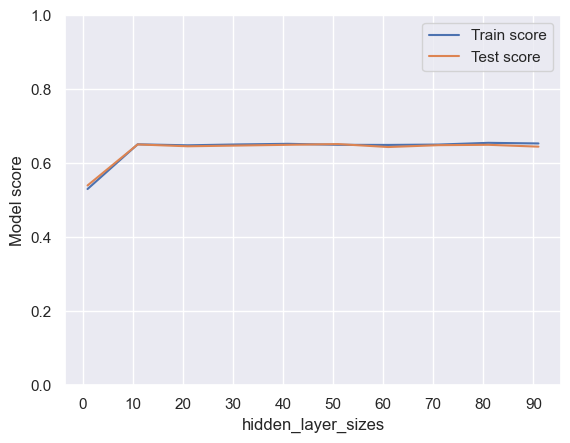

In [326]:
plt.plot(layer_size, train_scores, label="Train score")
plt.plot(layer_size, test_scores, label="Test score")
plt.ylim(0,1)
plt.xticks(np.arange(0,100,10))
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Model score")
plt.legend()

print(f"Max neural network score on the test data: {max(test_scores)*100:.2f}%")

In [327]:
f1_train_scores_logistic=[]
f1_test_scores_logistic=[]

for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000,activation='logistic')
    NN.fit(X1_train,y1_train)
    y1_train_pred = NN.predict(X1_train)
    y1_test_pred = NN.predict(X1_test)
    # update the training scores list
    f1_train_scores_logistic.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_logistic.append(f1_score(y1_test,y1_test_pred))

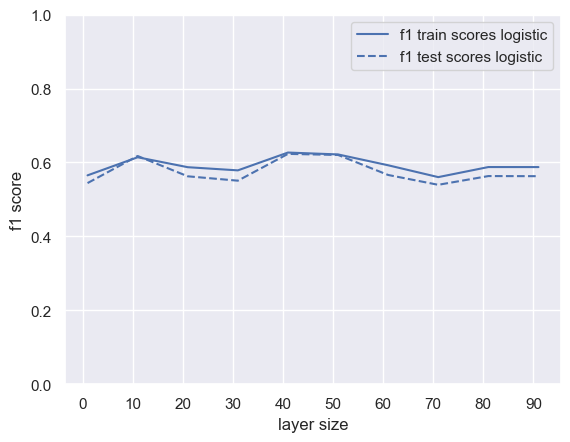

In [328]:
plt.plot(layer_size, f1_train_scores_logistic, label="f1 train scores logistic",color='C0',)
plt.plot(layer_size, f1_test_scores_logistic, label="f1 test scores logistic",color='C0', linestyle='--',)
plt.xticks(np.arange(0,100,10))
plt.ylim(0,1)
plt.xlabel("layer size")
plt.ylabel("f1 score")
plt.legend()

In [329]:
#RP reduction 4

In [330]:
tmp_dr = SparseRandomProjection(n_components=4, random_state=0)
tmp_X_tr = tmp_dr.fit_transform(df_scaler)

In [331]:
# import NN model
NN = MLPClassifier()
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(tmp_X_tr,y_1,test_size=0.25)

In [332]:
layer_size = range(1,100,10)
train_scores=[]
test_scores=[]
# loop through layers
for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000)
    NN.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(NN.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(NN.score(X1_test,y1_test))

Max neural network score on the test data: 71.70%


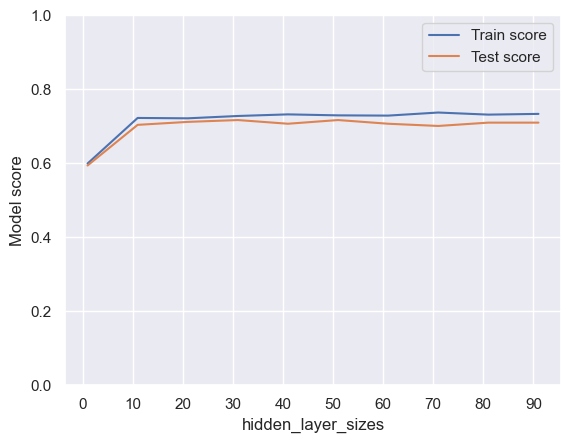

In [333]:
plt.plot(layer_size, train_scores, label="Train score")
plt.plot(layer_size, test_scores, label="Test score")
plt.ylim(0,1)
plt.xticks(np.arange(0,100,10))
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Model score")
plt.legend()

print(f"Max neural network score on the test data: {max(test_scores)*100:.2f}%")

In [334]:
f1_train_scores_logistic=[]
f1_test_scores_logistic=[]

for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000,activation='logistic')
    NN.fit(X1_train,y1_train)
    y1_train_pred = NN.predict(X1_train)
    y1_test_pred = NN.predict(X1_test)
    # update the training scores list
    f1_train_scores_logistic.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_logistic.append(f1_score(y1_test,y1_test_pred))

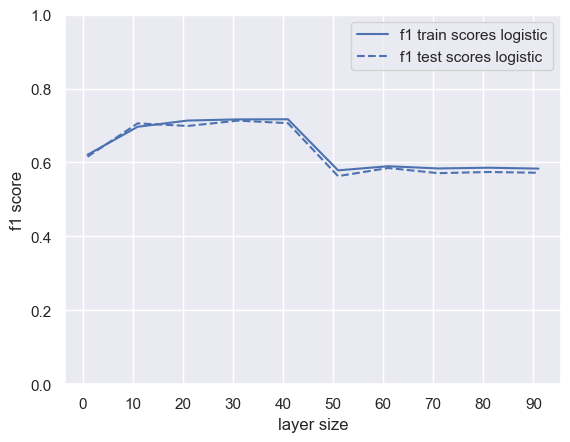

In [335]:
plt.plot(layer_size, f1_train_scores_logistic, label="f1 train scores logistic",color='C0',)
plt.plot(layer_size, f1_test_scores_logistic, label="f1 test scores logistic",color='C0', linestyle='--',)
plt.xticks(np.arange(0,100,10))
plt.ylim(0,1)
plt.xlabel("layer size")
plt.ylabel("f1 score")
plt.legend()

In [336]:
# isomap 2 compoent

In [337]:
tmp_dr = Isomap(n_components=2)
tmp_X_tr = tmp_dr.fit_transform(df_scaler)

In [338]:
NN = MLPClassifier()
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(tmp_X_tr,y_1,test_size=0.25)

In [339]:
layer_size = range(1,100,10)
train_scores=[]
test_scores=[]
# loop through layers
for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000)
    NN.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(NN.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(NN.score(X1_test,y1_test))

Max neural network score on the test data: 78.40%


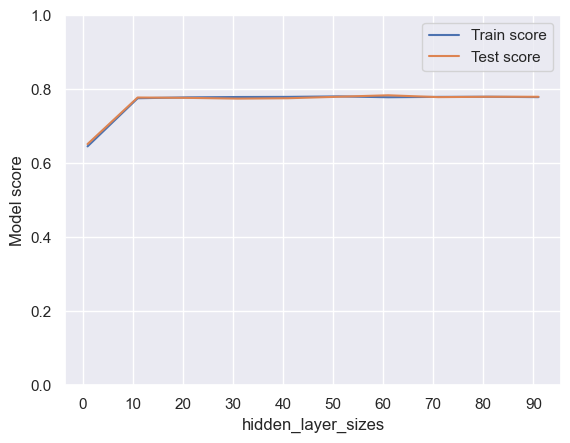

In [340]:
plt.plot(layer_size, train_scores, label="Train score")
plt.plot(layer_size, test_scores, label="Test score")
plt.ylim(0,1)
plt.xticks(np.arange(0,100,10))
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Model score")
plt.legend()

print(f"Max neural network score on the test data: {max(test_scores)*100:.2f}%")

In [341]:
f1_train_scores_logistic=[]
f1_test_scores_logistic=[]

for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000,activation='logistic')
    NN.fit(X1_train,y1_train)
    y1_train_pred = NN.predict(X1_train)
    y1_test_pred = NN.predict(X1_test)
    # update the training scores list
    f1_train_scores_logistic.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_logistic.append(f1_score(y1_test,y1_test_pred))

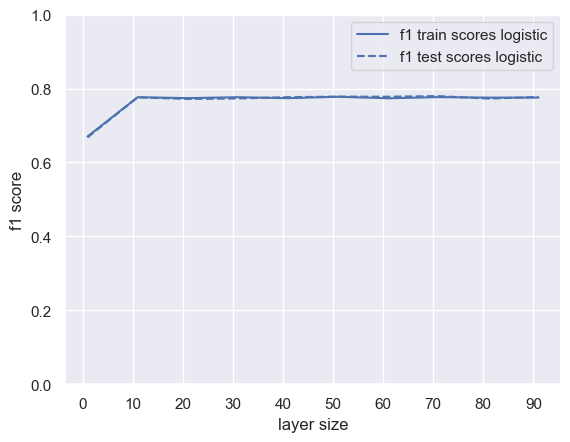

In [342]:
plt.plot(layer_size, f1_train_scores_logistic, label="f1 train scores logistic",color='C0',)
plt.plot(layer_size, f1_test_scores_logistic, label="f1 test scores logistic",color='C0', linestyle='--',)
plt.xticks(np.arange(0,100,10))
plt.ylim(0,1)
plt.xlabel("layer size")
plt.ylabel("f1 score")
plt.legend()

In [344]:
tmp_dr = Isomap(n_components=4)
tmp_X_tr = tmp_dr.fit_transform(df_scaler)

In [345]:
NN = MLPClassifier()
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(tmp_X_tr,y_1,test_size=0.25)

In [346]:
layer_size = range(1,100,10)
train_scores=[]
test_scores=[]
# loop through layers
for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000)
    NN.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(NN.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(NN.score(X1_test,y1_test))

Max neural network score on the test data: 84.40%


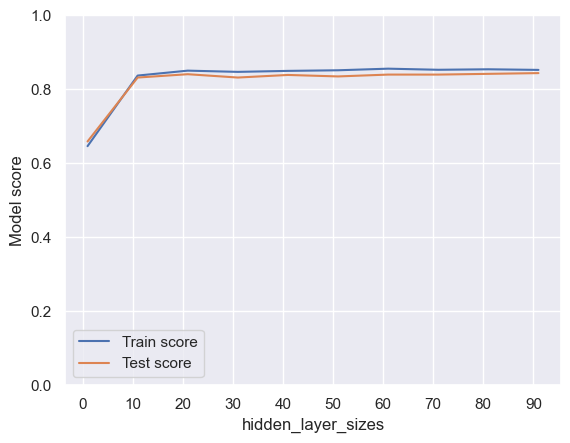

In [347]:
plt.plot(layer_size, train_scores, label="Train score")
plt.plot(layer_size, test_scores, label="Test score")
plt.ylim(0,1)
plt.xticks(np.arange(0,100,10))
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Model score")
plt.legend()

print(f"Max neural network score on the test data: {max(test_scores)*100:.2f}%")

In [348]:
f1_train_scores_logistic=[]
f1_test_scores_logistic=[]

for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000,activation='logistic')
    NN.fit(X1_train,y1_train)
    y1_train_pred = NN.predict(X1_train)
    y1_test_pred = NN.predict(X1_test)
    # update the training scores list
    f1_train_scores_logistic.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_logistic.append(f1_score(y1_test,y1_test_pred))

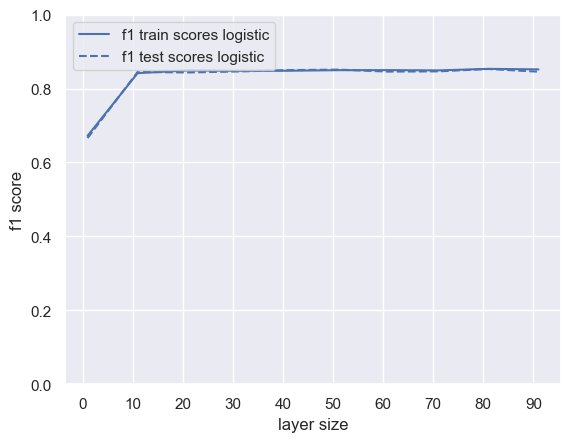

In [349]:
plt.plot(layer_size, f1_train_scores_logistic, label="f1 train scores logistic",color='C0',)
plt.plot(layer_size, f1_test_scores_logistic, label="f1 test scores logistic",color='C0', linestyle='--',)
plt.xticks(np.arange(0,100,10))
plt.ylim(0,1)
plt.xlabel("layer size")
plt.ylabel("f1 score")
plt.legend()

In [361]:
kmeans = KMeans(n_clusters=2,random_state=0, n_init='auto')
kmeans.fit(df_scaler)
y_kmean = kmeans.predict(df_scaler)

In [362]:
y_kmean

array([1, 1, 0, ..., 0, 1, 0])

In [365]:
df_scaler.loc[:,"y_kmean"]=y_kmean  # add cluster as new feature

In [366]:
df_scaler

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,y_kmean
0,-1.798424,-0.950373,2.993421,-1.424150,0.690545,-0.089872,-0.269415,1
1,-0.359060,-1.154404,2.127698,0.429746,0.176767,0.197020,-0.378997,1
2,0.109445,-0.225759,-0.652507,-0.946892,1.205422,-0.286156,1.206044,0
3,-0.079977,-0.800146,0.923916,-0.772399,1.619575,-2.087320,0.338315,1
4,0.968573,-0.191640,0.044164,-1.096894,1.305025,-0.961548,0.201472,0
...,...,...,...,...,...,...,...,...
3995,0.291729,-0.048594,-1.669449,-0.365345,0.614425,0.931482,0.028866,0
3996,0.108878,1.834105,0.137124,-1.159058,-0.252634,-0.846326,0.842347,1
3997,-1.105655,-0.716904,-1.013784,-0.234036,0.874379,2.275957,-0.668950,0
3998,-1.818112,-0.492908,1.459901,-0.845446,0.854549,-0.151419,-1.093171,1


In [367]:
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(df_scaler,y_1,test_size=0.25)

In [368]:
layer_size = range(1,100,10)
train_scores=[]
test_scores=[]
# loop through layers
for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000)
    NN.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(NN.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(NN.score(X1_test,y1_test))

Max neural network score on the test data: 93.90%


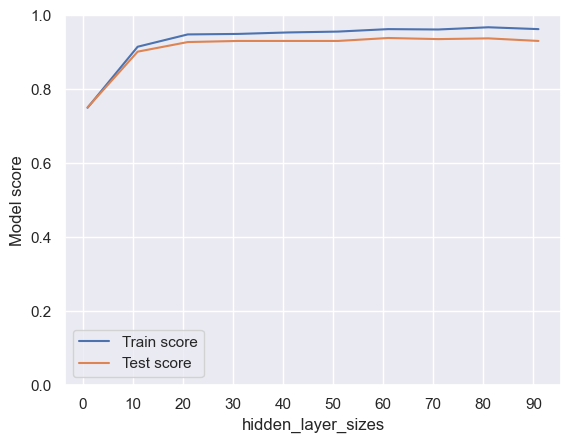

In [369]:
plt.plot(layer_size, train_scores, label="Train score")
plt.plot(layer_size, test_scores, label="Test score")
plt.ylim(0,1)
plt.xticks(np.arange(0,100,10))
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Model score")
plt.legend()

print(f"Max neural network score on the test data: {max(test_scores)*100:.2f}%")

In [370]:
f1_train_scores_logistic=[]
f1_test_scores_logistic=[]

for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000,activation='logistic')
    NN.fit(X1_train,y1_train)
    y1_train_pred = NN.predict(X1_train)
    y1_test_pred = NN.predict(X1_test)
    # update the training scores list
    f1_train_scores_logistic.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_logistic.append(f1_score(y1_test,y1_test_pred))

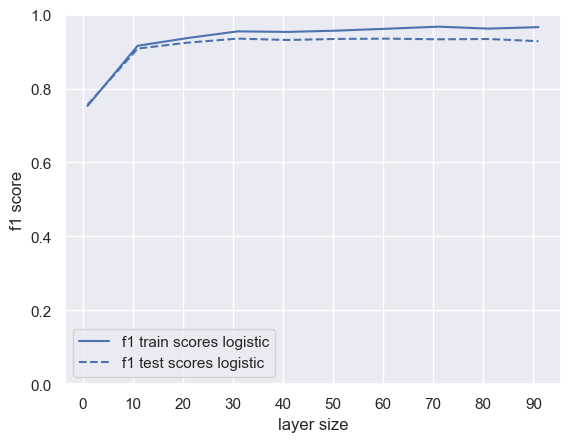

In [371]:
plt.plot(layer_size, f1_train_scores_logistic, label="f1 train scores logistic",color='C0',)
plt.plot(layer_size, f1_test_scores_logistic, label="f1 test scores logistic",color='C0', linestyle='--',)
plt.xticks(np.arange(0,100,10))
plt.ylim(0,1)
plt.xlabel("layer size")
plt.ylabel("f1 score")
plt.legend()

In [379]:
df_scaler = df_scaler.drop("y_kmean",axis=1)

In [380]:
df_scaler

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-1.798424,-0.950373,2.993421,-1.424150,0.690545,-0.089872,-0.269415
1,-0.359060,-1.154404,2.127698,0.429746,0.176767,0.197020,-0.378997
2,0.109445,-0.225759,-0.652507,-0.946892,1.205422,-0.286156,1.206044
3,-0.079977,-0.800146,0.923916,-0.772399,1.619575,-2.087320,0.338315
4,0.968573,-0.191640,0.044164,-1.096894,1.305025,-0.961548,0.201472
...,...,...,...,...,...,...,...
3995,0.291729,-0.048594,-1.669449,-0.365345,0.614425,0.931482,0.028866
3996,0.108878,1.834105,0.137124,-1.159058,-0.252634,-0.846326,0.842347
3997,-1.105655,-0.716904,-1.013784,-0.234036,0.874379,2.275957,-0.668950
3998,-1.818112,-0.492908,1.459901,-0.845446,0.854549,-0.151419,-1.093171


In [381]:
kmeans = KMeans(n_clusters=4,random_state=0, n_init='auto')
kmeans.fit(df_scaler)
y_kmean = kmeans.predict(df_scaler)

In [382]:
df_scaler.loc[:,"y_kmean"]=y_kmean  # add cluster as new feature

In [383]:
df_scaler

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,y_kmean
0,-1.798424,-0.950373,2.993421,-1.424150,0.690545,-0.089872,-0.269415,3
1,-0.359060,-1.154404,2.127698,0.429746,0.176767,0.197020,-0.378997,3
2,0.109445,-0.225759,-0.652507,-0.946892,1.205422,-0.286156,1.206044,1
3,-0.079977,-0.800146,0.923916,-0.772399,1.619575,-2.087320,0.338315,1
4,0.968573,-0.191640,0.044164,-1.096894,1.305025,-0.961548,0.201472,1
...,...,...,...,...,...,...,...,...
3995,0.291729,-0.048594,-1.669449,-0.365345,0.614425,0.931482,0.028866,0
3996,0.108878,1.834105,0.137124,-1.159058,-0.252634,-0.846326,0.842347,1
3997,-1.105655,-0.716904,-1.013784,-0.234036,0.874379,2.275957,-0.668950,0
3998,-1.818112,-0.492908,1.459901,-0.845446,0.854549,-0.151419,-1.093171,3


In [384]:
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(df_scaler,y_1,test_size=0.25)

In [385]:
layer_size = range(1,100,10)
train_scores=[]
test_scores=[]
# loop through layers
for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000)
    NN.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(NN.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(NN.score(X1_test,y1_test))

Max neural network score on the test data: 93.50%


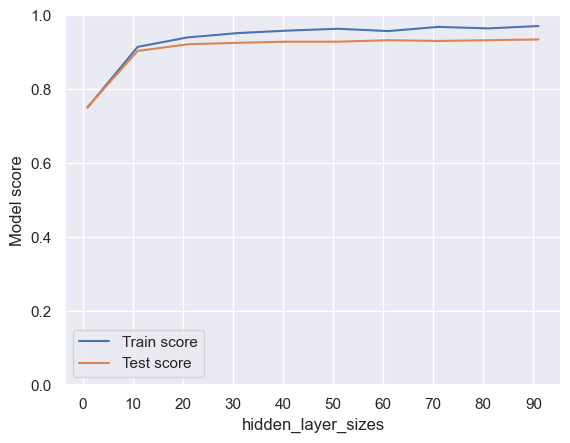

In [386]:
plt.plot(layer_size, train_scores, label="Train score")
plt.plot(layer_size, test_scores, label="Test score")
plt.ylim(0,1)
plt.xticks(np.arange(0,100,10))
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Model score")
plt.legend()

print(f"Max neural network score on the test data: {max(test_scores)*100:.2f}%")

In [387]:
df_scaler

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,y_kmean
0,-1.798424,-0.950373,2.993421,-1.424150,0.690545,-0.089872,-0.269415,3
1,-0.359060,-1.154404,2.127698,0.429746,0.176767,0.197020,-0.378997,3
2,0.109445,-0.225759,-0.652507,-0.946892,1.205422,-0.286156,1.206044,1
3,-0.079977,-0.800146,0.923916,-0.772399,1.619575,-2.087320,0.338315,1
4,0.968573,-0.191640,0.044164,-1.096894,1.305025,-0.961548,0.201472,1
...,...,...,...,...,...,...,...,...
3995,0.291729,-0.048594,-1.669449,-0.365345,0.614425,0.931482,0.028866,0
3996,0.108878,1.834105,0.137124,-1.159058,-0.252634,-0.846326,0.842347,1
3997,-1.105655,-0.716904,-1.013784,-0.234036,0.874379,2.275957,-0.668950,0
3998,-1.818112,-0.492908,1.459901,-0.845446,0.854549,-0.151419,-1.093171,3


In [388]:
df_scaler = df_scaler.drop("y_kmean",axis=1)

In [389]:
df_scaler

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-1.798424,-0.950373,2.993421,-1.424150,0.690545,-0.089872,-0.269415
1,-0.359060,-1.154404,2.127698,0.429746,0.176767,0.197020,-0.378997
2,0.109445,-0.225759,-0.652507,-0.946892,1.205422,-0.286156,1.206044
3,-0.079977,-0.800146,0.923916,-0.772399,1.619575,-2.087320,0.338315
4,0.968573,-0.191640,0.044164,-1.096894,1.305025,-0.961548,0.201472
...,...,...,...,...,...,...,...
3995,0.291729,-0.048594,-1.669449,-0.365345,0.614425,0.931482,0.028866
3996,0.108878,1.834105,0.137124,-1.159058,-0.252634,-0.846326,0.842347
3997,-1.105655,-0.716904,-1.013784,-0.234036,0.874379,2.275957,-0.668950
3998,-1.818112,-0.492908,1.459901,-0.845446,0.854549,-0.151419,-1.093171


In [390]:
# use EM cluster
gm = GaussianMixture(n_components=2, random_state=0,init_params='k-means++')
gm.fit(df_scaler)
y_gm=gm.predict(df_scaler)

In [391]:
y_gm

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [392]:
df_scaler.loc[:,"y_gm"]=y_gm  # add cluster as new feature

In [393]:
df_scaler

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,y_gm
0,-1.798424,-0.950373,2.993421,-1.424150,0.690545,-0.089872,-0.269415,0
1,-0.359060,-1.154404,2.127698,0.429746,0.176767,0.197020,-0.378997,0
2,0.109445,-0.225759,-0.652507,-0.946892,1.205422,-0.286156,1.206044,1
3,-0.079977,-0.800146,0.923916,-0.772399,1.619575,-2.087320,0.338315,1
4,0.968573,-0.191640,0.044164,-1.096894,1.305025,-0.961548,0.201472,1
...,...,...,...,...,...,...,...,...
3995,0.291729,-0.048594,-1.669449,-0.365345,0.614425,0.931482,0.028866,1
3996,0.108878,1.834105,0.137124,-1.159058,-0.252634,-0.846326,0.842347,1
3997,-1.105655,-0.716904,-1.013784,-0.234036,0.874379,2.275957,-0.668950,1
3998,-1.818112,-0.492908,1.459901,-0.845446,0.854549,-0.151419,-1.093171,0


In [394]:
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(df_scaler,y_1,test_size=0.25)

In [395]:
layer_size = range(1,100,10)
train_scores=[]
test_scores=[]
# loop through layers
for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000)
    NN.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(NN.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(NN.score(X1_test,y1_test))

Max neural network score on the test data: 95.10%


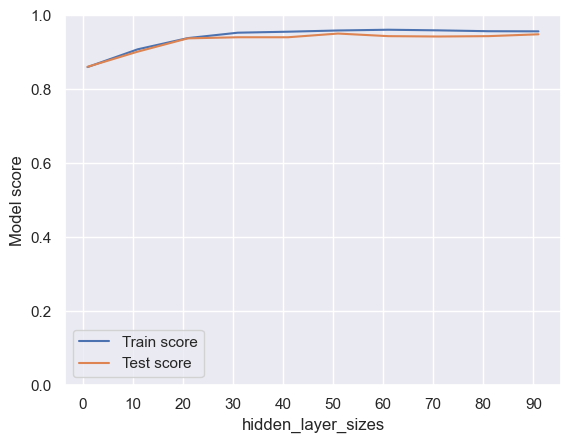

In [396]:
plt.plot(layer_size, train_scores, label="Train score")
plt.plot(layer_size, test_scores, label="Test score")
plt.ylim(0,1)
plt.xticks(np.arange(0,100,10))
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Model score")
plt.legend()

print(f"Max neural network score on the test data: {max(test_scores)*100:.2f}%")

In [397]:
f1_train_scores_logistic=[]
f1_test_scores_logistic=[]

for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000,activation='logistic')
    NN.fit(X1_train,y1_train)
    y1_train_pred = NN.predict(X1_train)
    y1_test_pred = NN.predict(X1_test)
    # update the training scores list
    f1_train_scores_logistic.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_logistic.append(f1_score(y1_test,y1_test_pred))

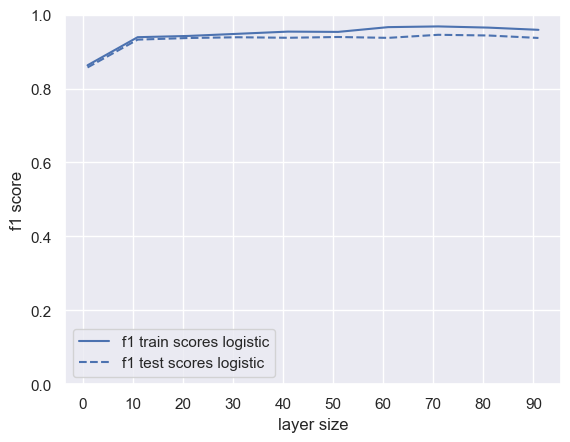

In [398]:
plt.plot(layer_size, f1_train_scores_logistic, label="f1 train scores logistic",color='C0',)
plt.plot(layer_size, f1_test_scores_logistic, label="f1 test scores logistic",color='C0', linestyle='--',)
plt.xticks(np.arange(0,100,10))
plt.ylim(0,1)
plt.xlabel("layer size")
plt.ylabel("f1 score")
plt.legend()

In [399]:
f1_test_scores_logistic

[0.8571428571428571,
 0.9324191968658179,
 0.9367588932806324,
 0.9388560157790927,
 0.9374379344587885,
 0.9395441030723488,
 0.9371884346959123,
 0.9454905847373637,
 0.9436201780415431,
 0.9369369369369369]